In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

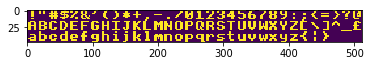

In [29]:
src = './Potash_8x8.png'
src = './BBCMode1.png'

#plt.imshow(imageio.imread('./c64_upp.gif'))
#plt.imshow(imageio.imread('./Potash_8x8.png'))
plt.imshow(imageio.imread(src))

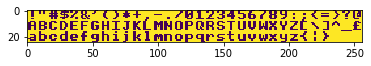

In [44]:
font = np.asarray(imageio.imread(src))

if src == './BBCMode1.png':
    font = font[::2, ::2]
    font = 255 - font

#font = np.asarray(imageio.imread('./c64_upp.gif'))
font = np.where(np.atleast_3d(font)[..., 0] == 255, 1, 0)

plt.imshow(font)

n_rows = font.shape[0] // 8
n_cols = font.shape[1] // 8
font = (font.reshape((font.shape[0], -1, 8))
        .transpose([1, 0, 2])
        .reshape((-1, n_rows, 8*8))
        .transpose([1, 0, 2])
        .reshape((-1, 8))
       )

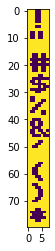

In [45]:
plt.imshow(font[:8*10,:])

In [46]:
#vals = np.zeros((font.shape[0],), np.uint16)
#vals[:16] = 0x0550
#vals[16:32] = 0x5050
#vals[32:48] = 0x5005
#for col in range(8):
#    vals ^= np.where(font[:, col], 0, 1<<(15-(2*col))).astype(np.uint16)

vals = np.zeros((font.shape[0],), np.uint8)
for col in range(8):
    vals |= np.where(font[:, col], 0, 1<<(7-col)).astype(np.uint8)

In [47]:
#with open('../tileram.hex', 'w') as f:
#    for v in vals:
#        print(f'{v:04x}', file=f)

In [48]:
with open('../font.bin', 'wb') as f:
    f.write(vals.tobytes())

In [49]:
len(vals.tobytes())

768

In [50]:
vals[0]

24